# Car Accident Severity Prediction for Driver Warning and Assistance Systems

### Applied Data Science Capstone, IBM Data Science Professional Certificate

## Table of Contents

1. Introduction
2. Data
3. Methodology
4. Results and Evaluation
5. Discussion
6. Conclusion

## Introduction and Business Understanding

Background:
Car accidents could occur due to several factors. Some of the most important ones are road conditions, weather and visibility conditions. These conditions also influence the severity of the accidents. In this study, we try to predict the severity of car accidents through reliable and robust machine learning models. 

Business Problem:
There could be several factors that influence the occurrence and severity of car accidents. This study aims to investigate three main factors: Weather, Road conditions and Visibility conditions on the severity of accidents. A robust algorithm must be developed to predict the severity of accidents, so that the drivers could be warned about it. 

Interest:
The Seattle transportation department would be very interested in predicting the severity of accidents and so, make the target audience for this case study. Since the study deals with predicting the severity of car accidents, the results would be particularly helpful for them to plan and improve the road conditions in the city and placement of street lights. They would also be curious to know the influence of other factors like weather and visibility conditions on the occurrence of accidents and the level of severity. The results of this study could also be useful to the drivers to show them the consequences of driving under these conditions. Another interesting application of this study is to assist the Active safety or Driver Assistance Systems of cars about the current driving conditions, in order to enhance the development and performance of such systems. 

## Data

### Data loading und understanding

In [1]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The data being used in this study is the collision reports from Seattle, collected over several years (2004-present) by the Seattle Police Department and Traffic Records department. The data has 37 independent variables and 194,673 records. There are several attributes in this data, but the ones that are of interest in this study are: “WEATHER”, “ROADCOND” and “LIGHTCOND”. Different conditions of weather, road and light conditions are mentioned in the data. 

The target variable is “SEVERITYCODE”. It is made up of numbers, which correspond to different levels of severity:
* 0 No/negligible probability: no/negligible chance 
* 1 Very low probability: Chance of car damage
* 2 Low probability: Chance of injury and/or car damage
* 3 Mild probability: Chance of serious injury and car damage
* 4 High probability: Fatal and car damage

### Data Pre-processing

Most columns are of type ‘object’ and even if there are numbers, they might correspond to different categories. Some columns and rows have null values, which will be dealt with during this phase. We must use label encoding on these columns to convert the features to numbers. But first, we should drop the columns which are not required for this study.

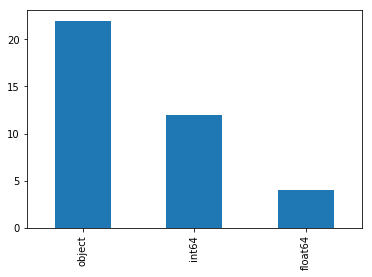

In [58]:
df.dtypes.value_counts().plot(kind='bar')

In [5]:
# Drop all columns with no predictive value for the context of this project
pro_data = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# Label Encoding
# Convert column to category
pro_data["WEATHER"] = pro_data["WEATHER"].astype('category')
pro_data["ROADCOND"] = pro_data["ROADCOND"].astype('category')
pro_data["LIGHTCOND"] = pro_data["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
pro_data["WEATHER_CAT"] = pro_data["WEATHER"].cat.codes
pro_data["ROADCOND_CAT"] = pro_data["ROADCOND"].cat.codes
pro_data["LIGHTCOND_CAT"] = pro_data["LIGHTCOND"].cat.codes

pro_data.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


### Overview of the dataset

In [6]:
pro_data.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [8]:
pro_data["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [9]:
pro_data["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
pro_data["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [7]:
pro_data["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As seen above, the Dataset is not balanced. To balance the dataset, the number of accidents with SEVERITYCODE=1 are downsampled

In [13]:
from sklearn.utils import resample

pro_data_majority = pro_data[pro_data.SEVERITYCODE==1]
pro_data_minority = pro_data[pro_data.SEVERITYCODE==2]

#Downsample majority class
pro_data_majority_downsampled = resample(pro_data_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
pro_data_balanced = pd.concat([pro_data_majority_downsampled, pro_data_minority])

# Display new class counts
pro_data_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

## Methodology

A supervised learning model will be built using this data to come up with a formula that can predict the severity of an accident based on the inputs. Now that the data is ready, we can train the machine learning models with this data. The different models investigated here are:

1. K Nearest Neighbour:
2. Decision Tree
3. Logistic Regression

### Define the feature vector and the dependent variable values

In [15]:
import numpy as np
X = np.asarray(pro_data_balanced[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [16]:
y = np.asarray(pro_data_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1])

### Normalize the feature vector

In [17]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

### Make training and test splits of dataset

For this study, we will split the dataset as follows: 75% of the dataset becomes the training set and the rest 25% would be the test set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87282, 3) (87282,)
Test set: (29094, 3) (29094,)


### 1. K Nearest Neighbours Model

In this method, the severity code of a test point is predicted by analyzing it's neighbors. It is important to find the best 'k', so that the model performs with the best accuracy.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51189249, 0.51206434, 0.51656699, 0.51457345, 0.5131986 ,
       0.5119956 , 0.50938338, 0.50237162, 0.50154671, 0.50240599,
       0.51464219, 0.50240599, 0.50941775, 0.50092803, 0.51168626,
       0.510552  , 0.5068399 , 0.50989895, 0.50969272, 0.50900529,
       0.51337045, 0.51347357, 0.51532962, 0.51206434])

In [22]:
k = 3 #best accuracy
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([1, 1, 1, 1, 1])

In [25]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.5174148163424303
Test set Accuracy:  0.5165669897573383


In [31]:
print (yhat_knn [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 2 1 1 1]


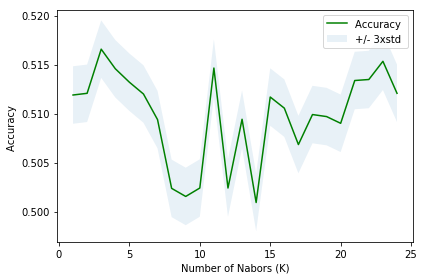

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### 2. Decision Tree 

In [45]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10)
clf_tree = clf_tree.fit(X_train, y_train)
yhat_dt = clf_tree.predict(X_test)
yhat_dt

array([2, 2, 1, ..., 2, 1, 2])

In [46]:
print (yhat_dt [0:5])
print (y_test [0:5])

[2 2 1 1 2]
[2 2 1 1 1]


### 3. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
LRyhat = LR.predict(X_test)
LRyhat

array([1, 2, 1, ..., 2, 1, 2])

In [29]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57263745, 0.42736255],
       [0.47083235, 0.52916765],
       [0.67438763, 0.32561237],
       ...,
       [0.47083235, 0.52916765],
       [0.68326727, 0.31673273],
       [0.46947758, 0.53052242]])

In [30]:
print (LRyhat [0:5])
print (y_test [0:5])

[1 2 1 1 1]
[2 2 1 1 1]


## Results and Evaluation

It is important to check how the different models perform using some evaluation metrics. This will help us identify the most reliable and robust model for this data science problem. For evaluating the models, we use the test set, which is 25% of the total dataset. There are different metrics that can be compared:
1. Jaccard similarity score
2. F1 score
3. Log loss for logistic regression model

In [32]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### K Nearest Neighbour

In [33]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat_knn)

0.5165669897573383

In [34]:
# F1-SCORE
f1_score(y_test, yhat_knn, average='macro')

0.46423304964062817

K=3 gives the maximum accuracy

### Decision Tree

In [47]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat_dt)

0.56688664329415

In [48]:
# F1-SCORE
f1_score(y_test, yhat_dt, average='macro')

0.5431403441878632

### Logistic Regression

In [37]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LRyhat)

0.5274283357393277

In [38]:
# F1-SCORE
f1_score(y_test, LRyhat, average='macro')

0.5127901543870825

In [39]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6849604847680921

## Discussion

To start with, the data was loaded and studied. Columns with type 'object' were converted into categorial classes using label encoding. 

An important observation at this stage was that the dataset was imablanced. The solution to this was downsampling the majority class with sklearn's resample tool. The majority class was downsampled appropriately in order to make the dataset balanced.

After the preprocessing stage, the dataset was split into training and test sets in the ratio of 3:1. This is important in order to build accurate models and to prevent overfitting. The training data was then fed through three ML models: K-Nearest Neighbor, Decision Tree and Logistic Regression. 

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and additionally, log loss for logistic regression. Choosing different k values helped determine the most accurate KNN model. Similarly, the max depth of the Decision tree and C for Logistic regression is also varied and the most accurate values are found. The results of evaluation were compared to determine the best suited model for this data science problem.

## Conclusion

Based on the evaluation results, it can be observed that the decision tree performs the best. Hence, it could be chosen to model this dataset. 